In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import json

config = json.load(open('../config/config.json'))
df = pd.read_csv('../simulation_results/realization_1.csv')

df.head()

,Time,AgentID,AgentType,PosX,PosY,Radius
0,0.0,0,ZOMBIE,-1.802653,-1.839851,1.5
1,0.0,1,HUMAN,-5.387635,7.337260,0.5
2,0.0,2,HUMAN,-6.538861,-5.989945,0.5
3,0.0,3,HUMAN,4.554194,-8.046282,0.5
4,0.0,4,HUMAN,-3.745469,2.230269,1.5


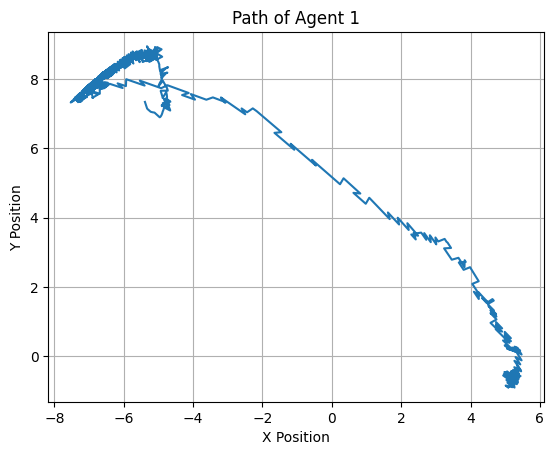

In [53]:
def plot_agent_path(df: pd.DataFrame, agent_id: int, config: dict):
    df_filtered = df[df['AgentID'] == agent_id]
    arena_radius = config['arenaRadius']
    plt.plot(df_filtered['PosX'], df_filtered['PosY'])
    plt.xlabel('X Position')
    plt.xlim(-arena_radius, arena_radius)
    plt.ylabel('Y Position')
    plt.ylim(-arena_radius, arena_radius)
    plt.title(f'Path of Agent {agent_id}')
    plt.axis('equal')
    plt.grid(True)
    plt.show()

plot_agent_path(df, 1, config)

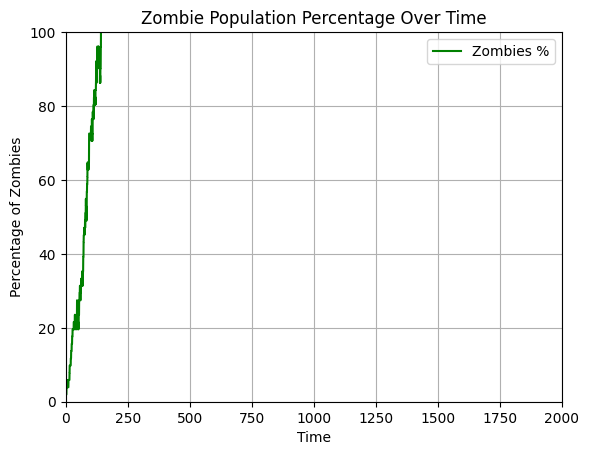

In [54]:
def plot_zombie_percentage(df: pd.DataFrame, config: dict):
    # Calculate percentage of zombies over time
    agent_counts = df.groupby(['Time', 'AgentType']).size().unstack(fill_value=0)
    total_agents = agent_counts['HUMAN'] + agent_counts['ZOMBIE']
    zombie_percentage = (agent_counts['ZOMBIE'] / total_agents) * 100
    max_time = config['simulationTime']
    # Create the plot
    plt.plot(agent_counts.index, zombie_percentage, label='Zombies %', color='green')
    plt.xlabel('Time')
    plt.ylabel('Percentage of Zombies')
    plt.title('Zombie Population Percentage Over Time')
    plt.ylim(0, 100)  # Set y-axis limits from 0 to 100
    plt.xlim(0, max_time)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_zombie_percentage(df, config)

In [55]:
df = pd.read_csv('../simulation_results/finish_states_0.8.csv')
df.head()


,Id,Time,NumZombies,NumHumans,averageVelocity
0,1,307.8,51,0,0.350430
1,2,291.1,51,0,0.265790
2,3,264.7,51,0,0.513047
3,4,298.9,51,0,0.362950
4,5,297.9,51,0,0.287841


In [57]:
df['averageVelocity'].describe()

count    24.000000
mean      0.325275
std       0.145843
min       0.064945
25%       0.215531
50%       0.290155
75%       0.467935
max       0.643097
Name: averageVelocity, dtype: float64